In [106]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")



# Data Perparation

## S&P

In [107]:
path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/'
files = ['SPGlobal_capital_cost.xlsx','SPGlobal_grade_and_contained.xlsx',
'SPGlobal_claim.xlsx','SPGlobal_loc_risk.xlsx','SPGlobal_operator_1.xlsx',
'SPGlobal_coal_details.xlsx','SPGlobal_operator_2.xlsx','SPGlobal_ore_capacity_1.xlsx',
'SPGlobal_comment.xlsx','SPGlobal_ore_capacity_2.xlsx',
'SPGlobal_commodity_capacity_1.xlsx','SPGlobal_ore_production_and_costs.xlsx',
'SPGlobal_commodity_capacity_2.xlsx','SPGlobal_ownership_info.xlsx',
'SPGlobal_production_rank.xlsx',
'SPGlobal_contractor.xlsx','SPGlobal_royalty_detail.xlsx',
'SPGlobal_cur_ownership_detail.xlsx','SPGlobal_technology_geology.xlsx',
'SPGlobal_drill_hole.xlsx','SPGlobal_tonnage_and_volume.xlsx',
'SPGlobal_drill_interval_grade.xlsx','SPGlobal_transaction_details_1.xlsx',
'SPGlobal_transaction_details_2.xlsx']
files = [path+i for i in files]

print('------------'*5, '\n Loading data')
main = pd.read_excel(path+'SPGlobal_general_info.xlsx')
for f in files:
    temp = pd.read_excel(f)
    main = pd.merge(main, temp, how='left')


------------------------------------------------------------ 
 Loading data


In [108]:
main = main[['prop_id', 'owner_country', 'primary_commodity', 'commodities_list', 'geologic_ore_body_type', 'production_forms', 'capital_cost_type', 'amt_capital_invested', 'proj_closure_yr', 'country/region_op_risk', 'country/region_ter_risk', 'country/region_pol_risk', 'country/region_sec_risk']]


## manually_imputed_data

In [109]:
nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_ma_imputed2.xlsx')


## merge

In [110]:
main = main[main['prop_id'].isin(nickel_mine_ma_proccessed['prop_id'].tolist())]
df = pd.merge(nickel_mine_ma_proccessed, main, how='outer')
df.shape


(1459, 40)

In [111]:
df['mine_life'] = df.apply(lambda x:x['proj_closure_yr'] if not pd.isna(x['proj_closure_yr']) else x['mine_life'], axis=1)
del df['proj_closure_yr']


In [112]:
df = df[['prop_id', 'prop_name', 'also_known_as', 'owner_name', 'owner_country', 'country_name', 'actv_status', 'dev_stage', 'mine_type1', 'longitude', 'latitude', 'yr_source_date', 'reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'primary_commodity', 'commodities_list', 'deposit_type', 'geologic_ore_body_type', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'production_forms', 'metall_process', 'recovery_Ni_perc', 'production_capacity', 'start_year', 'mine_life', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)', 'capital_cost_type', 'amt_capital_invested', 'country/region_op_risk', 'country/region_ter_risk', 'country/region_pol_risk', 'country/region_sec_risk', 'remark']]


## Heijlen

In [113]:
# df2 = pd.read_excel("/Users/linzipeng/Desktop/ScienceDirect_files_26Apr2022_08-37-31.905/1-s2.0-S0301420721002166-mmc2.xlsx",
#                     skiprows=2)
# df2.head()


# Data Processing

## grade

In [114]:
df.groupby('country_name')['grade (%)'].agg([np.mean, np.median])


mean    median
country_name                          
Albania             1.025000  1.000000
Argentina                NaN       NaN
Australia           1.335294  0.960000
Austria                  NaN       NaN
Botswana            0.369000  0.325000
Brazil              1.172250  1.295000
Burkina Faso             NaN       NaN
Burundi             1.310000  1.310000
Cameroon            0.660000  0.660000
Canada              1.087382  0.880000
China               0.892381  0.680000
Colombia            1.200000  1.200000
Cote d'Ivoire       1.116500  1.116500
Cuba                1.150000  1.150000
Dem. Rep. Congo          NaN       NaN
Dominican Republic  1.405000  1.405000
Ethiopia                 NaN       NaN
Finland             0.402304  0.240000
France                   NaN       NaN
Gabon                    NaN       NaN
Germany                  NaN       NaN
Greece              0.810000  0.810000
Greenland                NaN       NaN
Guatemala           1.788000  1.860000
Guinea              1.280000  1.280000
Guyana                   NaN       NaN
India                    NaN       NaN
Indonesia           1.610773  1.730000
Italy                    NaN       NaN
Japan                    NaN       NaN
Kazakhstan          0.790000  0.790000
Laos                     NaN       NaN
Madagascar          1.270000  1.270000
Malaysia            0.750000  0.750000
Mauritania               NaN       NaN
Mexico                   NaN       NaN
Mozambique               NaN       NaN
Myanmar             1.455000  1.455000
New Caledonia       2.087040  2.230000
New Zealand              NaN       NaN
North Korea              NaN       NaN
North Macedonia     1.100000  1.100000
Norway              0.520000  0.445000
Papua New Guinea    1.033333  1.060000
Paraguay                 NaN       NaN
Peru                     NaN       NaN
Philippines         1.339355  1.300000
Poland                   NaN       NaN
Portugal                 NaN       NaN
Russia              0.710182  0.793494
Saudi Arabia             NaN       NaN
Serbia              0.900000  0.900000
Sierra Leone             NaN       NaN
Slovakia                 NaN       NaN
Solomon Islands     1.550000  1.550000
South Africa        0.215488  0.170000
South Korea              NaN       NaN
Spain               0.652174  0.652174
Sweden              0.864667  0.214000
Taiwan, China            NaN       NaN
Tanzania            1.110000  0.815000
Togo                0.990000  0.990000
Tonga               1.295000  1.300000
Turkey              0.915000  0.915000
USA                 0.515876  0.165000
Uganda                   NaN       NaN
Ukraine                  NaN       NaN
United Kingdom           NaN       NaN
Venezuela           1.480000  1.480000
Vietnam             2.200000  2.200000
Yemen                    NaN       NaN
Zambia              0.995000  0.995000
Zimbabwe            0.475000  0.540000

<AxesSubplot:>

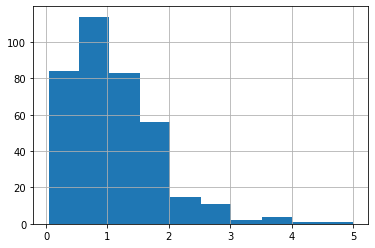

In [115]:
df['grade (%)'].hist()


In [116]:
grade_dic = df.groupby('country_name')['grade (%)'].median().dropna().to_dict()
world_median = df['grade (%)'].median()
for i in set(df.country_name) - set(grade_dic.keys()):
    grade_dic.update({i:world_median})
grade_dic


{'Albania': 1.0,
 'Australia': 0.96,
 'Botswana': 0.325,
 'Brazil': 1.295,
 'Burundi': 1.31,
 'Cameroon': 0.66,
 'Canada': 0.88,
 'China': 0.68,
 'Colombia': 1.2,
 "Cote d'Ivoire": 1.1165,
 'Cuba': 1.15,
 'Dominican Republic': 1.405,
 'Finland': 0.24,
 'Greece': 0.81,
 'Guatemala': 1.86,
 'Guinea': 1.28,
 'Indonesia': 1.73,
 'Kazakhstan': 0.79,
 'Madagascar': 1.27,
 'Malaysia': 0.75,
 'Myanmar': 1.455,
 'New Caledonia': 2.23,
 'North Macedonia': 1.1,
 'Norway': 0.445,
 'Papua New Guinea': 1.06,
 'Philippines': 1.3,
 'Russia': 0.7934943820224719,
 'Serbia': 0.9,
 'Solomon Islands': 1.55,
 'South Africa': 0.16999999999999998,
 'Spain': 0.6521739130434783,
 'Sweden': 0.214,
 'Tanzania': 0.815,
 'Togo': 0.99,
 'Tonga': 1.3,
 'Turkey': 0.9149999999999999,
 'USA': 0.165,
 'Venezuela': 1.48,
 'Vietnam': 2.2,
 'Zambia': 0.995,
 'Zimbabwe': 0.54,
 'Burkina Faso': 1.0,
 'Mozambique': 1.0,
 'Greenland': 1.0,
 'Argentina': 1.0,
 'Japan': 1.0,
 'Italy': 1.0,
 'Laos': 1.0,
 'Slovakia': 1.0,
 'Austri

In [117]:
# use country median
impute_grade_index = df['grade (%)'].isnull()
df.loc[impute_grade_index, 'grade (%)'] =\
df.loc[impute_grade_index, 'country_name'].replace(grade_dic)


## recovery_Ni_perc

use metall_process and country_name

https://qspace.library.queensu.ca/bitstream/handle/1974/8538/Rodrigues_Filipe_M_201312_MASc.pdf;sequence=3

In [118]:
world_median = df['recovery_Ni_perc'].median()

recovery_Ni_perc_dic = df.groupby('metall_process')['recovery_Ni_perc'].median().dropna().to_dict()
recovery_Ni_perc_dic


{'CARON': 75.0,
 'F': 74.15,
 'HL': 85.0,
 'HPAL': 85.8,
 'HPAL + DSO': 74.3,
 'RKEF': 85.0,
 'RKEF + HPAL': 53.0,
 'beneficiation': 50.72,
 'hydrometallurgy': 19.365000000000002,
 'pyrometallurgy': 85.0,
 'pyrometallurgy + hydrometallurgy': 61.86}

In [119]:
for i in set(df.metall_process) - set(recovery_Ni_perc_dic.keys()):
    recovery_Ni_perc_dic.update({i:np.nan})


In [120]:
# use metall_process
impute_recovery_Ni_perc_index1 = df['recovery_Ni_perc'].isnull() & df['metall_process']
df.loc[impute_recovery_Ni_perc_index1, 'recovery_Ni_perc'] = df.loc[impute_recovery_Ni_perc_index1, 'metall_process'].replace(recovery_Ni_perc_dic)


In [121]:
# use country median
recovery_Ni_perc_dic = df.groupby('country_name')['recovery_Ni_perc'].median().dropna().to_dict()
for i in set(df.country_name) - set(recovery_Ni_perc_dic.keys()):
    recovery_Ni_perc_dic.update({i:world_median})
recovery_Ni_perc_dic


{'Australia': 85.0,
 'Brazil': 86.4,
 'Cameroon': 16.43,
 'Canada': 74.80000000000001,
 'China': 73.7,
 'Colombia': 90.4,
 'Cuba': 79.0,
 'Dominican Republic': 85.0,
 'Finland': 62.435,
 'Greece': 85.0,
 'Guatemala': 85.0,
 'Indonesia': 85.0,
 'Kazakhstan': 89.5,
 'Madagascar': 86.0,
 'Myanmar': 85.0,
 'New Caledonia': 85.4,
 'Papua New Guinea': 86.3,
 'Philippines': 85.8,
 'Russia': 71.15,
 'Serbia': 85.0,
 'South Africa': 50.72,
 'Tonga': 50.72,
 'Turkey': 84.5,
 'USA': 72.8,
 'Venezuela': 85.0,
 'Vietnam': 78.1,
 'Zambia': 76.35,
 'Zimbabwe': 81.6,
 'Burkina Faso': 76.4,
 'Mozambique': 76.4,
 'Solomon Islands': 76.4,
 'Greenland': 76.4,
 'Argentina': 76.4,
 'Norway': 76.4,
 'Japan': 76.4,
 'Italy': 76.4,
 'Spain': 76.4,
 'Laos': 76.4,
 'Albania': 76.4,
 'Slovakia': 76.4,
 'Austria': 76.4,
 'North Korea': 76.4,
 'India': 76.4,
 "Cote d'Ivoire": 76.4,
 'United Kingdom': 76.4,
 'Dem. Rep. Congo': 76.4,
 'Germany': 76.4,
 'Ukraine': 76.4,
 'Yemen': 76.4,
 'Poland': 76.4,
 'Sweden': 76.4

In [122]:
impute_recovery_Ni_perc_index2 = df['recovery_Ni_perc'].isnull()
df.loc[impute_recovery_Ni_perc_index2, 'recovery_Ni_perc'] = df.loc[impute_recovery_Ni_perc_index2, 'country_name'].replace(recovery_Ni_perc_dic)


## production

use recovery_Ni_perc

In [123]:
# impute Production_ROM_Ni_tpa
# use recovery_Ni_perc
impute_production_index1 = df['production_ROM_Ni_tpa'].isnull() & \
                           df['production_PROD_Ni_tpa'].notnull()
df.loc[impute_production_index1, 'production_ROM_Ni_tpa'] = df.loc[impute_production_index1, 'production_PROD_Ni_tpa'] / df.loc[impute_production_index1, 'recovery_Ni_perc'] * 100 
impute_production_index1 = impute_production_index1 & (impute_recovery_Ni_perc_index1 | impute_recovery_Ni_perc_index2)


In [124]:
# impute production_PROD_Ni_tpa
# use recovery_Ni_perc
impute_production_index2 = df['production_PROD_Ni_tpa'].isnull() & \
                           df['production_ROM_Ni_tpa'].notnull()
df.loc[impute_production_index2, 'production_PROD_Ni_tpa'] = df.loc[impute_production_index2, 'production_ROM_Ni_tpa'] * df.loc[impute_production_index2, 'recovery_Ni_perc'] / 100
impute_production_index2 = impute_production_index2 & (impute_recovery_Ni_perc_index1 | impute_recovery_Ni_perc_index2)


## Resource & reserve

### production_resv_ratio

use country_name

In [125]:
df['production_resv_ratio'] = df['production_PROD_Ni_tpa'] / df['reserve_metal (mt)']


In [126]:
p_r_ratio_dic = df.groupby('country_name')['production_resv_ratio'].median().dropna().to_dict()
world_median = df['production_resv_ratio'].median()
for i in set(df.country_name) - set(p_r_ratio_dic.keys()):
    p_r_ratio_dic.update({i:world_median})
p_r_ratio_dic


{'Albania': 0.04600329861420655,
 'Australia': 0.06325937241446444,
 'Brazil': 0.018910742477621457,
 'Cameroon': 0.014990960057464234,
 'Canada': 0.07709224996714707,
 'China': 0.04313671583611312,
 'Colombia': 0.1439617117117117,
 "Cote d'Ivoire": 0.0061861194029850745,
 'Cuba': 0.031203139330169858,
 'Dominican Republic': 0.032163993481430654,
 'Finland': 0.0925863121481381,
 'Greece': 0.05216572890934058,
 'Guatemala': 0.05179211469534051,
 'Indonesia': 0.03818212392656936,
 'Kazakhstan': 0.019120482177153095,
 'Madagascar': 0.030778284671532846,
 'Myanmar': 0.024285714285714285,
 'New Caledonia': 0.013601586851799376,
 'Papua New Guinea': 0.05873015873015873,
 'Philippines': 0.07029,
 'Russia': 0.05815489401478386,
 'Serbia': 0.05118595390437492,
 'South Africa': 0.022571819425444596,
 'Turkey': 0.007354411764705883,
 'USA': 0.07559869290929003,
 'Venezuela': 0.15254237288135594,
 'Zambia': 0.07300948912913549,
 'Zimbabwe': 0.03911639762107052,
 'Burkina Faso': 0.04600329861420656

In [127]:
impute_production_resv_ratio_index = df['production_resv_ratio'].isnull()
df.loc[impute_production_resv_ratio_index, 'production_resv_ratio'] = df.loc[impute_production_resv_ratio_index, 'country_name'].replace(p_r_ratio_dic)


### reserve

use grade and production_resv_ratio

In [128]:
# impute reserve_metal (mt)
# use grade
impute_reserve_index1 = df['reserve_metal (mt)'].isnull() & \
                        df['reserve_ore (mt)'].notnull()
df.loc[impute_reserve_index1, 'reserve_metal (mt)'] = df.loc[impute_reserve_index1, 'reserve_ore (mt)'] * df.loc[impute_reserve_index1, 'grade (%)'] / 100 
impute_reserve_index1 = impute_reserve_index1 & impute_grade_index

# use production_resv_ratio
impute_reserve_index2 = df['reserve_metal (mt)'].isnull() & \
                        df['reserve_ore (mt)'].isnull() & \
                        df['production_PROD_Ni_tpa'].notnull()
df.loc[impute_reserve_index2, 'reserve_metal (mt)'] = df.loc[impute_reserve_index2, 'production_PROD_Ni_tpa'] / df.loc[impute_reserve_index2, 'production_resv_ratio'] 

impute_reserve_index2 = impute_reserve_index2 & impute_grade_index


In [129]:
# impute resv_ore_tonnage (mt)
# use grade
impute_reserve_index3 = df['reserve_ore (mt)'].isnull() & \
                        df['reserve_metal (mt)'].notnull()
df.loc[impute_reserve_index3, 'reserve_ore (mt)'] = df.loc[impute_reserve_index3, 'reserve_metal (mt)'] / df.loc[impute_reserve_index3, 'grade (%)'] * 100  
impute_reserve_index3 = impute_reserve_index3 & impute_grade_index


### resource

use grade

In [130]:
# impute resource_metal (mt)
# use grade
impute_resource_index1 = df['resource_ore (million mt)'].notnull() & \
                         df['resource_metal (mt)'].isnull()
df.loc[impute_resource_index1, 'resource_metal (mt)'] = df.loc[impute_resource_index1, 'resource_ore (million mt)'] * df.loc[impute_resource_index1, 'grade (%)'] / 100 * 10**6  
impute_resource_index1 = impute_resource_index1 & impute_grade_index


In [131]:
# impute resource_ore (million mt)
# use grade
impute_resource_index2 = df['resource_ore (million mt)'].isnull() & \
                         df['resource_metal (mt)'].notnull()
df.loc[impute_resource_index2, 'resource_ore (million mt)'] = df.loc[impute_resource_index2, 'resource_metal (mt)'] / df.loc[impute_resource_index2, 'grade (%)'] * 100 / 10**6  
impute_resource_index2 = impute_resource_index2 & impute_grade_index


## deposit type

In [132]:
df['deposit_type'].value_counts()


Laterite                        103
Magmatic Sulphide               100
Hydrothermal Ni                  11
Laterite & Magmatic Sulphide      1
Name: deposit_type, dtype: int64

In [133]:
df['geologic_ore_body_type'].value_counts()


Laterite (Generic)                                                                                              128
Layered Mafic-Ultramafic Intrusion                                                                               54
Komatiitic Magmatic                                                                                              33
Laterite (Ni-Co - Limonite), Laterite (Ni-Saprolite)                                                             15
Laterite (Generic), Laterite (Ni-Saprolite)                                                                      10
Volcanogenic Massive Sulfide (VMS)                                                                                7
Laterite (Ni-Co - Limonite)                                                                                       7
Flood Basalt (Dyke-Sill Complexes)                                                                                6
Laterite (Ni-Saprolite)                                                 

In [134]:
# merge ore_body_type & deposit_type
df['is_laterite'] = df['geologic_ore_body_type'].str.contains('Laterite').astype(float)
df['is_sulfide'] = (df['geologic_ore_body_type'].str.contains('Mafic-Ultramafic') + df['geologic_ore_body_type'].str.contains('Sulfide') + \
                    df['geologic_ore_body_type'].str.contains('Komatiitic Magmatic') + df['geologic_ore_body_type'].str.contains('Basalt')).map(lambda x: 1 if x>0 else x)

df['ore_body_type'] = df.apply(lambda x: 'Laterite & Magmatic Sulphide' if (x['is_laterite']==1) & (x['is_sulfide']==1)
                               else 'Laterite' if (x['is_laterite']==1)
                               else 'Magmatic Sulphide' if (x['is_sulfide']==1)
                               else 'Other' if pd.notna(x['geologic_ore_body_type'])
                               else np.nan, axis=1)

df['deposit_type'] = df.apply(lambda x:x['deposit_type'] if not pd.isna(x['deposit_type']) else x['ore_body_type'], axis=1)


In [135]:
df['is_laterite'] = df['deposit_type'].str.contains('Laterite').astype(float)
df['is_sulfide'] = df['deposit_type'].str.contains('Magmatic Sulphide').astype(float)


In [136]:
from sklearn.impute import KNNImputer

impute_deposit_type_index = df['is_laterite'].isnull()
imp = KNNImputer(n_neighbors=3, weights='distance', add_indicator=False)
df[['is_laterite', 'is_sulfide']] = imp.fit_transform(df[['latitude', 'longitude', 'is_laterite', 'is_sulfide']])[:,2:]
df.loc[impute_deposit_type_index, ['is_laterite', 'is_sulfide']] = df.loc[impute_deposit_type_index, ['is_laterite', 'is_sulfide']].applymap(lambda x: 1 if x>0.5 else 0) 


In [137]:
df.loc[impute_deposit_type_index, 'deposit_type'] = df.loc[impute_deposit_type_index, ].apply(
    lambda x: 'Laterite & Magmatic Sulphide' if x['is_laterite']+x['is_sulfide']==2 else
    'Laterite' if x['is_laterite']==1 else
    'Magmatic Sulphide' if x['is_sulfide']==1 else np.nan,
    axis=1)


In [138]:
df['is_hydrothermal'] = df['deposit_type'].fillna('').str.contains('Hydrothermal').astype(int)


In [139]:
df['deposit_type'].value_counts()


Magmatic Sulphide               859
Laterite                        487
Other                            19
Laterite & Magmatic Sulphide     14
Hydrothermal Ni                  11
Name: deposit_type, dtype: int64

In [140]:
df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']] = \
df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']].round(2) 


## production_capacity

### outlier

<AxesSubplot:>

550000.0

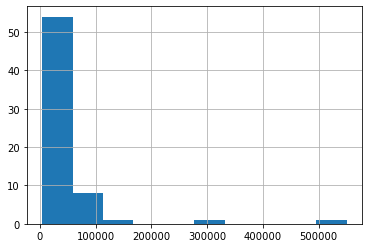

In [144]:
df['production_capacity'].hist()
df['production_capacity'].max()

In [141]:
df['production_capatiy_ratio'] = df['production_PROD_Ni_tpa'] / df['production_capacity']
df[['prop_name', 'production_capatiy_ratio', 'production_PROD_Ni_tpa', 'production_capacity']].dropna()


prop_name  production_capatiy_ratio  production_PROD_Ni_tpa  \
0                  Codemin                  0.900000                  8100.0   
10                    Ramu                  0.896970                 29600.0   
12                Jinchuan                  0.625000                100000.0   
18             Punta Gorda                  0.709677                 22000.0   
19                 Moa Bay                  0.945943                 33108.0   
21              Barro Alto                  0.753333                 33900.0   
29              Santa Rita                  0.830303                 13700.0   
35                Ambatovy                  0.562217                 33733.0   
37                Falcondo                  0.937500                 30000.0   
38                 Diggers                  0.007000                  3850.0   
40            Cerro Matoso                  1.162164                 63919.0   
42                Taganito                  1.076667                 32300.0   
44      Sudbury Operations                  0.634737                 60300.0   
47                Sorowako                  0.740000                 59200.0   
48                Weda Bay                  0.837500                 40200.0   
52            Voisey's Bay                  0.686000                 34300.0   
53                Rio Tuba                  2.791667                 67000.0   
56        Ontario Division                  0.884848                 58400.0   
57               Terrafame                  0.780000                 27300.0   
58                Koniambo                  0.395000                 23700.0   
59               Onca Puma                  0.403774                 21400.0   
62                   Larco                  0.782609                 18000.0   
64           Murrin Murrin                  0.913333                 41100.0   
65                Leinster                  0.593333                 26700.0   
67                Savannah                  0.603500                  4828.0   
68                     SNL                  0.632000                 47400.0   
70                    Goro                  0.425455                 23400.0   
75          Loma de Niquel                  0.476471                  8100.0   
124      Clean TeQ Sunrise                  1.028889                 18520.0   
332                 Cosmos                  1.301000                 13010.0   
346         Honeymoon Well                  0.029882                  1344.7   
369       Central Musgrave                  0.955000                 38200.0   
523   Trident - Enterprise                  0.824158                 31318.0   
551               Vermelho                  0.540356                 24316.0   
557                 Jacare                  0.102666                  3593.3   
579               Morowali                  0.800000                240000.0   
581          Huake Smelter                  1.000000                 45000.0   
632             Gag Island                  0.900667                 27020.0   
730                  Fenix                  1.156000                 28900.0   
858                   Feni                  0.750000                 15000.0   
1018      Pobugsky Smelter                  0.750000                 15000.0   
1340   Harjavalta Refinery                  0.577778                 26000.0   

      production_capacity  
0                  9000.0  
10                33000.0  
12               160000.0  
18                31000.0  
19                35000.0  
21                45000.0  
29                16500.0  
35                60000.0  
37                32000.0  
38               550000.0  
40                55000.0  
42                30000.0  
44                95000.0  
47                80000.0  
48                48000.0  
52                50000.0  
53                24000.0  
56                66000.0  
57                35000.0  
58              

In [38]:
idx = df['production_PROD_Ni_tpa'].notnull() & df['production_capacity'].notnull()
df.loc[idx, 'production_capacity'] = df.loc[idx].apply(lambda x: x['production_capacity'] if x['production_PROD_Ni_tpa']/x['production_capacity']<=1.2 else x['production_PROD_Ni_tpa']*1.2, axis=1)


In [39]:
df['production_capatiy_ratio'] = df['production_PROD_Ni_tpa'] / df['production_capacity']
df[['prop_name', 'production_capatiy_ratio', 'production_PROD_Ni_tpa', 'production_capacity']].dropna()


prop_name  production_capatiy_ratio  production_PROD_Ni_tpa  \
0                  Codemin                  0.900000                  8100.0   
10                    Ramu                  0.896970                 29600.0   
12                Jinchuan                  0.625000                100000.0   
18             Punta Gorda                  0.709677                 22000.0   
19                 Moa Bay                  0.945943                 33108.0   
21              Barro Alto                  0.753333                 33900.0   
29              Santa Rita                  0.830303                 13700.0   
35                Ambatovy                  0.562217                 33733.0   
37                Falcondo                  0.937500                 30000.0   
38                 Diggers                  0.007000                  3850.0   
40            Cerro Matoso                  1.162164                 63919.0   
42                Taganito                  1.076667                 32300.0   
44      Sudbury Operations                  0.634737                 60300.0   
47                Sorowako                  0.740000                 59200.0   
48                Weda Bay                  0.837500                 40200.0   
52            Voisey's Bay                  0.686000                 34300.0   
53                Rio Tuba                  0.833333                 67000.0   
56        Ontario Division                  0.884848                 58400.0   
57               Terrafame                  0.780000                 27300.0   
58                Koniambo                  0.395000                 23700.0   
59               Onca Puma                  0.403774                 21400.0   
62                   Larco                  0.782609                 18000.0   
64           Murrin Murrin                  0.913333                 41100.0   
65                Leinster                  0.593333                 26700.0   
67                Savannah                  0.603500                  4828.0   
68                     SNL                  0.632000                 47400.0   
70                    Goro                  0.425455                 23400.0   
75          Loma de Niquel                  0.476471                  8100.0   
124      Clean TeQ Sunrise                  1.028889                 18520.0   
332                 Cosmos                  0.833333                 13010.0   
346         Honeymoon Well                  0.029882                  1344.7   
369       Central Musgrave                  0.955000                 38200.0   
523   Trident - Enterprise                  0.824158                 31318.0   
551               Vermelho                  0.540356                 24316.0   
557                 Jacare                  0.102666                  3593.3   
579               Morowali                  0.800000                240000.0   
581          Huake Smelter                  1.000000                 45000.0   
632             Gag Island                  0.900667                 27020.0   
730                  Fenix                  1.156000                 28900.0   
858                   Feni                  0.750000                 15000.0   
1018      Pobugsky Smelter                  0.750000                 15000.0   
1340   Harjavalta Refinery                  0.577778                 26000.0   

      production_capacity  
0                  9000.0  
10                33000.0  
12               160000.0  
18                31000.0  
19                35000.0  
21                45000.0  
29                16500.0  
35                60000.0  
37                32000.0  
38               550000.0  
40                55000.0  
42                30000.0  
44                95000.0  
47                80000.0  
48                48000.0  
52                50000.0  
53                80400.0  
56                66000.0  
57                35000.0  
58              

### production capacity ratio

In [40]:
df.dropna(subset=['production_capatiy_ratio']).groupby('country_name')['production_capatiy_ratio'].agg([np.mean, np.std, np.count_nonzero]).dropna()

mean       std  count_nonzero
country_name                                    
Australia      0.620534  0.402840              8
Brazil         0.588405  0.301711              6
Canada         0.735195  0.132114              3
Cuba           0.827810  0.167065              2
Finland        0.678889  0.142993              2
Indonesia      0.855633  0.099580              5
New Caledonia  0.484152  0.128943              3
Philippines    0.955000  0.172063              2

In [41]:
df.dropna(subset=['production_capatiy_ratio']).groupby('mine_type1')['production_capatiy_ratio'].agg([np.mean, np.std, np.count_nonzero]).dropna()

mean       std  count_nonzero
mine_type1                                    
Open Pit     0.738218  0.264685             33
Underground  0.598070  0.312747              6

In [42]:
df.dropna(subset=['production_capatiy_ratio']).groupby('deposit_type')['production_capatiy_ratio'].agg([np.mean, np.std, np.count_nonzero]).dropna()

mean       std  count_nonzero
deposit_type                                        
Hydrothermal Ni    0.802079  0.031224              2
Laterite           0.763126  0.249560             28
Magmatic Sulphide  0.661439  0.258559             11

In [43]:
# use deposit_type
production_capatiy_ratio_dic = df.groupby('deposit_type')['production_capatiy_ratio'].mean().to_dict()
production_capatiy_ratio_dic


{'Hydrothermal Ni': 0.8020789473684211,
 'Laterite': 0.7631257565288879,
 'Laterite & Magmatic Sulphide': 0.029882222222222223,
 'Magmatic Sulphide': 0.6614393456092021,
 'Other': nan}

In [44]:
# use deposit_type
impute_production_capacity_index1 = df['production_PROD_Ni_tpa'].notnull() & df['production_capacity'].isnull() & df['deposit_type'].notnull()
df.loc[impute_production_capacity_index1, 'production_capacity'] = df.loc[impute_production_capacity_index1, 'production_PROD_Ni_tpa'] /\
                                                                   df.loc[impute_production_capacity_index1, 'deposit_type'].replace(production_capatiy_ratio_dic)


### long

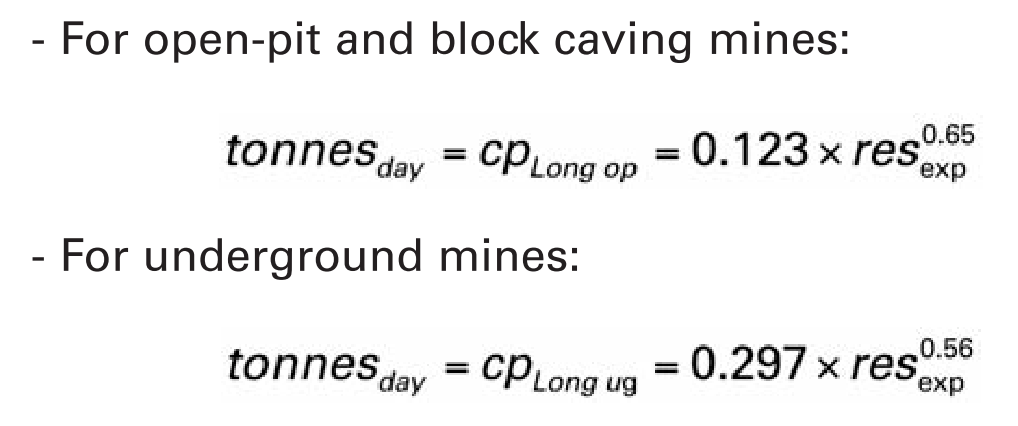

In [45]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

def func(x,a,b):
      return a*np.power(x, b)
    

797.3358698705657

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

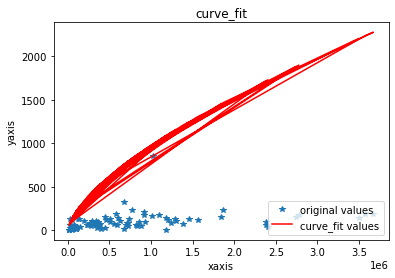

In [46]:
x = df[df['mine_type1']=='Open Pit'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['mine_type1']=='Open Pit'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
yvals=func(x,0.123,0.65)
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


341.6484566197601

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

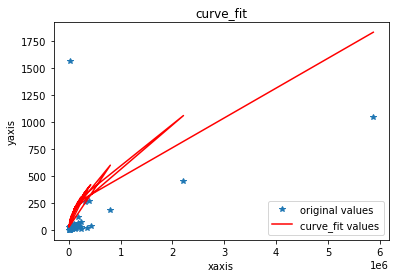

In [47]:
x = df[df['mine_type1']=='Underground'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['mine_type1']=='Underground'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
yvals=func(x,0.297,0.56)
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


### my fit all

0.03232624263152484

0.6070779761312942

164.33257059940865

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

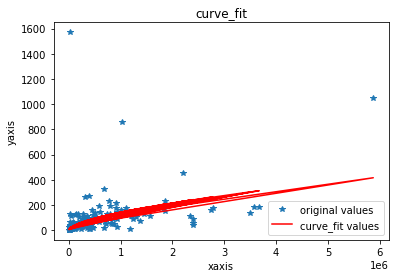

In [48]:
x = df[['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
popt,pcov=curve_fit(func,x,y)
a=popt[0] #popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
a
b
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


### my fit by mine type

1.811928681964911

0.3044563407767532

94.3507921661604

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

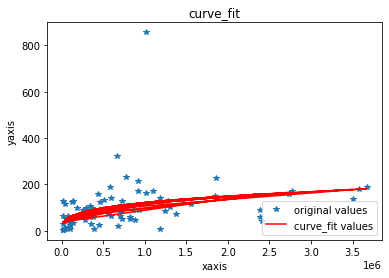

In [49]:
x = df[df['mine_type1']=='Open Pit'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['mine_type1']=='Open Pit'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
popt,pcov=curve_fit(func,x,y)
a=popt[0] #popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
a
b
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


0.01378576095418885

0.7188137408084588

259.9243624058804

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

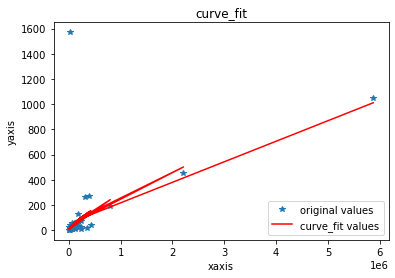

In [50]:
x = df[df['mine_type1']=='Underground'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['mine_type1']=='Underground'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
popt,pcov=curve_fit(func,x,y)
a=popt[0] #popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
a
b
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


### my fit by deposit type

0.6473507193846356

0.3766229930683918

93.80654530497229

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

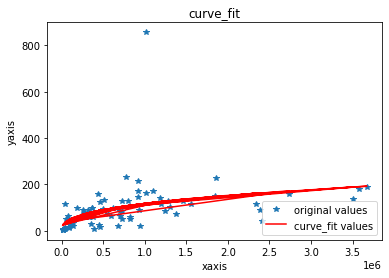

In [51]:
x = df[df['deposit_type']=='Laterite'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['deposit_type']=='Laterite'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
popt,pcov=curve_fit(func,x,y)
a=popt[0] #popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
a
b
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


0.00031683703368013105

0.9509524748449353

214.99319944298716

Text(0.5, 0, 'xaxis')

Text(0, 0.5, 'yaxis')

Text(0.5, 1.0, 'curve_fit')

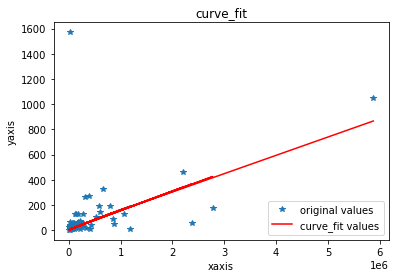

In [52]:
x = df[df['deposit_type']=='Magmatic Sulphide'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,0]
y = df[df['deposit_type']=='Magmatic Sulphide'][['reserve_metal (mt)', 'production_capacity']].dropna().values[:,1]/350
popt,pcov=curve_fit(func,x,y)
a=popt[0] #popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
a
b
mean_squared_error(y, yvals, squared=False)

plot1=plt.plot(x,y,'*',label='original values')
plot2=plt.plot(x,yvals,'r',label='curve_fit values')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
plt.show()


### fit using deposit type

In [53]:
a = 0.01692391768667905
b = 0.7078073223232975
impute_production_capacity_index2 = (df['deposit_type']=='Laterite') & df['reserve_metal (mt)'].notnull() & df['production_capacity'].isnull()
df.loc[impute_production_capacity_index2, 'production_capacity'] = df.loc[impute_production_capacity_index2, 'reserve_metal (mt)'].map(lambda x: func(x,a,b)) * 350


In [54]:
a = 7.500699276531266e-06
b = 1.1996374863757813
impute_production_capacity_index3 = (df['deposit_type']=='Magmatic Sulphide') & df['reserve_metal (mt)'].notnull() & df['production_capacity'].isnull()
df.loc[impute_production_capacity_index3, 'production_capacity'] = df.loc[impute_production_capacity_index3, 'reserve_metal (mt)'].map(lambda x: func(x,a,b)) * 350


In [145]:
df['production_capacity'].max()

550000.0

In [ ]:
df['production_capacity'].map(lambda x: min(x, 30000))

## check world reserve and production

In [55]:
labels = ['USA', 'Australia', 'Brazil', 'Canada', 'China', 'Cuba',
       'Dominican Republic', 'Indonesia', 'New Caledonia', 'Philippines',
       'Russia']
df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = df.groupby('country_name_new')['reserve_metal (mt)', 'production_PROD_Ni_tpa'].sum().astype(int)


In [56]:
stat['resv_ratio'] = (stat['reserve_metal (mt)'] / stat['reserve_metal (mt)'].sum()).map(lambda x: str(np.round(x*100, 2))+'%') 
stat['production_ratio'] = (stat['production_PROD_Ni_tpa'] / stat['production_PROD_Ni_tpa'].sum()).map(lambda x: str(np.round(x*100, 2))+'%')
stat


reserve_metal (mt)  production_PROD_Ni_tpa resv_ratio  \
country_name_new                                                            
Australia                     10599752                  401030      9.24%   
Brazil                        10634626                  118749      9.27%   
Canada                         6477985                  335202      5.64%   
China                          5640432                  117270      4.91%   
Cuba                           3009060                   55108      2.62%   
Dominican Republic             1025120                   30000      0.89%   
Indonesia                     22590132                  635790     19.68%   
New Caledonia                 13309952                  211828      11.6%   
Philippines                    7475635                  348381      6.51%   
Russia                         8565140                  286330      7.46%   
USA                             394979                   19567      0.34%   
others                        25049870                  533275     21.83%   

                   production_ratio  
country_name_new                     
Australia                    12.97%  
Brazil                        3.84%  
Canada                       10.84%  
China                         3.79%  
Cuba                          1.78%  
Dominican Republic            0.97%  
Indonesia                    20.56%  
New Caledonia                 6.85%  
Philippines                  11.27%  
Russia                        9.26%  
USA                           0.63%  
others                       17.24%

In [57]:
# usgs_stat
usgs_stat = pd.read_excel('USGS_nickel_by_country.xlsx', index_col='Unnamed: 0')
usgs_stat['Reserves_ratio'] = usgs_stat['Reserves'] / 94000000
usgs_stat


Production_2019  Production_2020e  Production_2019_ratio  \
USA                           13500             16000               0.005172   
Australia                    159000            170000               0.060920   
Brazil                        60600             73000               0.023218   
Canada                       181000            150000               0.069349   
China                        120000            120000               0.045977   
Cuba                          49200             49000               0.018851   
Dominican Republic            56900             47000               0.021801   
Indonesia                    853000            760000               0.326820   
New Caledonia                208000            200000               0.079693   
Philippines                  323000            320000               0.123755   
Russia                       279000            280000               0.106897   
Others                       310000            290000               0.118774   
World                       2610000           2500000               1.000000   

                    Production_2020e_ratio  Reserves  Reserves_ratio  
USA                                 0.0064    100000        0.001064  
Australia                           0.0680  20000000        0.212766  
Brazil                              0.0292  16000000        0.170213  
Canada                              0.0600   2800000        0.029787  
China                               0.0480   2800000        0.029787  
Cuba                                0.0196   5500000        0.058511  
Dominican Republic                  0.0188    930000        0.009894  
Indonesia                           0.3040  21000000        0.223404  
New Caledonia                       0.0800  12000000        0.127660  
Philippines                         0.1280   4800000        0.051064  
Russia                              0.1120   6900000        0.073404  
Others                              0.1160  14000000        0.148936  
World                               1.0000  94000000        1.000000

In [58]:
stat = pd.concat([stat, usgs_stat], axis=1).dropna()


In [59]:
# usgs_stat = usgs_stat.iloc[:-1]
# colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
# t = plt.figure(figsize=(8, 8))
# patches,l_text,p_text = plt.pie(x=usgs_stat['Production_2020e'], labels=usgs_stat.index, autopct = '%.1f%%', labeldistance=1.1,
#             colors = colors, startangle = 90, counterclock = False, rotatelabels=None, textprops={'fontsize': 20})
# plt.yticks(rotation=45)
# plt.title('Nickel: production share worldwide by country')
# for t in l_text:
#     t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
# for l in p_text:
#     l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

In [60]:
# colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
# t = plt.figure(figsize=(8, 8))
# patches,l_text,p_text = plt.pie(x=usgs_stat['Reserves'], labels=usgs_stat.index, autopct = '%.1f%%', labeldistance=1.1,
#             colors = colors, startangle = 90, counterclock = False, rotatelabels=None, textprops={'fontsize': 20})
# plt.yticks(rotation=45)
# plt.title('Nickel: reserve share worldwide by country')
# for t in l_text:
#     t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
# for l in p_text:
#     l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

In [61]:
stat['reserve_metal (mt)'] / stat['Reserves']


Australia             0.529988
Brazil                0.664664
Canada                2.313566
China                 2.014440
Cuba                  0.547102
Dominican Republic    1.102280
Indonesia             1.075721
New Caledonia         1.109163
Philippines           1.557424
Russia                1.241325
USA                   3.949790
dtype: float64

In [62]:
(stat['production_PROD_Ni_tpa'] / stat['Production_2019']).dropna()


Australia             2.522201
Brazil                1.959554
Canada                1.851945
China                 0.977250
Cuba                  1.120081
Dominican Republic    0.527241
Indonesia             0.745358
New Caledonia         1.018404
Philippines           1.078579
Russia                1.026272
USA                   1.449407
dtype: float64

In [63]:
stat['reserve_metal (mt)'].sum() / 94000000
stat['reserve_metal (mt)'].sum()
# 储量多了


0.9544980106382979

89722813.0

In [64]:
stat['production_PROD_Ni_tpa'].sum()
stat['production_PROD_Ni_tpa'].sum() / 2600000


2559255.0

0.9843288461538462

## other

### status & stage

In [65]:
df.loc[df['production_PROD_Ni_tpa'].notnull(), 'dev_stage'] = 'Operating'
df.loc[df['production_PROD_Ni_tpa'].notnull(), 'actv_status'] = 'Active'


In [66]:
df.loc[df['reserve_metal (mt)'].notnull() & \
       df['dev_stage'].isin(['Grassroots', 'Exploration', 'Target Outline', 'Advanced Exploration', 'Prefeas/Scoping']), 'dev_stage'] = 'Feasibility'


In [67]:
df.loc[df['resource_metal (mt)'].notnull() & \
       df['dev_stage'].isin(['Grassroots', 'Exploration', 'Target Outline']), 'dev_stage'] = 'Prefeas/Scoping'


### other features (for fitting)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x = v.fit_transform(df['commodities_list'].fillna(''))
temp = pd.DataFrame(x.toarray(), columns=['contain_'+i for i in v.get_feature_names()])
temp = temp[temp.mean()[temp.mean()>0.01].index]
df = pd.concat([df, temp], axis=1)


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x = v.fit_transform(df['production_forms'].fillna(''))
temp = pd.DataFrame(x.toarray(), columns=['produce_'+i for i in v.get_feature_names()])
temp = temp[temp.mean()[temp.mean()>0.01].index]
df = pd.concat([df, temp], axis=1)


In [70]:
# from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer()
# x = v.fit_transform(df['geologic_ore_body_type'].fillna(''))
# temp = pd.DataFrame(x.toarray(), columns=['orebody_'+i for i in v.get_feature_names()])
# temp = temp[temp.mean()[temp.mean()>0.01].index]
# df = pd.concat([df, temp], axis=1)


In [71]:
# labels = df['country_name'].value_counts().head(20).index
# df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
# df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

# temp = pd.get_dummies(df['country_name_new'], 'country')
# df = pd.concat([df, temp], axis=1)


In [72]:
# labels = df['owner_country'].value_counts().head(20).index
# df.loc[:, 'owner_country_new'] = df.loc[:, 'owner_country']
# df.loc[~df['owner_country'].isin(labels), 'owner_country_new'] = 'others'

# temp = pd.get_dummies(df['owner_country_new'], prefix='owner_country')
# df = pd.concat([df, temp], axis=1)


In [73]:
# labels = df['owner_name'].value_counts().head(40).index
# df.loc[:, 'owner_name_new'] = df.loc[:, 'owner_name']
# df.loc[~df['owner_name'].isin(labels), 'owner_name_new'] = 'others'

# temp = pd.get_dummies(df['owner_name_new'], prefix='owner')
# df = pd.concat([df, temp], axis=1)


In [74]:
temp = pd.get_dummies(df['metall_process'], prefix='metall_process')
df = pd.concat([df, temp], axis=1)


In [75]:
temp = pd.get_dummies(df['mine_type1'], prefix='mine_type')
df = pd.concat([df, temp], axis=1)


In [76]:
temp = pd.get_dummies(df['dev_stage'], prefix='dev_stage')
df = pd.concat([df, temp], axis=1)


In [77]:
temp = pd.get_dummies(df['actv_status'], prefix='actv_status')
df = pd.concat([df, temp], axis=1)


In [78]:
df['is_nickel_primary'] = (df['primary_commodity']=='Nickel').astype(int)


In [79]:
df['country/region_ter_risk_num'] = df['country/region_ter_risk'].map({'Medium':2, 'High':3, 'Low':1, 'Insignificant':0}).fillna(2)
df['country/region_sec_risk_num'] = df['country/region_sec_risk'].map({'Medium':2, 'High':3, 'Low':1, 'Insignificant':0}).fillna(2)
df['country/region_pol_risk_num'] = df['country/region_pol_risk'].map({'Medium':2, 'High':3, 'Low':1, 'Insignificant':0}).fillna(2)
df['country/region_op_risk_num'] = df['country/region_op_risk'].map({'Medium':2, 'High':3, 'Low':1, }).fillna(2)


### cash cost

In [80]:
col = df.select_dtypes(exclude='O').drop(['cash_cost (nickel USD/t)', 'cash_cost (nickel USC/lb)', 'cash_cost (ore USD/t)', 'contain_nickel',
                                          'prop_id', 'longitude','latitude', 'yr_source_date', 'contain_ore', 'production_PROD_Ni_tpa'],axis=1).columns
len(col)
col


87

Index(['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)',
       'resource_ore (million mt)', 'resource_metal (mt)',
       'production_ROM_Ni_tpa', 'recovery_Ni_perc', 'production_capacity',
       'start_year', 'mine_life', 'amt_capital_invested',
       'production_resv_ratio', 'is_laterite', 'is_sulfide', 'is_hydrothermal',
       'production_capatiy_ratio', 'contain_chromite', 'contain_cobalt',
       'contain_copper', 'contain_gold', 'contain_iridium', 'contain_iron',
       'contain_lead', 'contain_magnesium', 'contain_palladium',
       'contain_platinum', 'contain_rhodium', 'contain_ruthenium',
       'contain_silver', 'contain_zinc', 'produce_cathodes',
       'produce_concentrate', 'produce_matte', 'produce_ore',
       'metall_process_ATL?', 'metall_process_CARON', 'metall_process_Caron',
       'metall_process_DNI', 'metall_process_DSO', 'metall_process_F',
       'metall_process_HL', 'metall_process_HPAL', 'metall_process_HPAL + DSO',
       'metall_process_HPAL+F', '

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
  
# the independent variables set
X = df[col]
X = X.apply(lambda x: x.fillna(x.median()), axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                                            feature        VIF
0                                  reserve_ore (mt)   3.841394
1                                         grade (%)   8.776484
2                                reserve_metal (mt)   4.644791
3                         resource_ore (million mt)   3.749002
4                               resource_metal (mt)   3.587961
5                             production_ROM_Ni_tpa   3.082038
6                                  recovery_Ni_perc  98.833800
7                               production_capacity   2.334563
8                                        start_year   1.466042
9                                         mine_life   2.643555
10                             amt_capital_invested   1.638760
11                            production_resv_ratio   3.380738
12                                      is_laterite   7.332876
13                                       is_sulfide   9.971704
14                                  is_hydrothermal   2

In [82]:
stat = df.dropna(subset=['cash_cost (nickel USD/t)'])[col].apply(lambda x: x.value_counts(normalize=True).iloc[0])
col = stat[stat<0.9].index.tolist()
len(col)
col


40

['reserve_ore (mt)',
 'grade (%)',
 'reserve_metal (mt)',
 'resource_ore (million mt)',
 'resource_metal (mt)',
 'production_ROM_Ni_tpa',
 'recovery_Ni_perc',
 'production_capacity',
 'start_year',
 'mine_life',
 'amt_capital_invested',
 'production_resv_ratio',
 'is_laterite',
 'is_sulfide',
 'production_capatiy_ratio',
 'contain_chromite',
 'contain_cobalt',
 'contain_copper',
 'contain_gold',
 'contain_iridium',
 'contain_iron',
 'contain_palladium',
 'contain_platinum',
 'contain_rhodium',
 'contain_ruthenium',
 'contain_silver',
 'produce_concentrate',
 'produce_matte',
 'metall_process_F',
 'metall_process_HPAL',
 'metall_process_pyrometallurgy',
 'metall_process_pyrometallurgy + hydrometallurgy',
 'mine_type_Open Pit',
 'mine_type_Underground',
 'dev_stage_Operating',
 'is_nickel_primary',
 'country/region_ter_risk_num',
 'country/region_sec_risk_num',
 'country/region_pol_risk_num',
 'country/region_op_risk_num']

In [83]:
df['production_capatiy_ratio'] = df['production_PROD_Ni_tpa'] / df['production_capacity']

In [84]:
df[['production_capatiy_ratio', 'production_PROD_Ni_tpa', 'production_capacity']]

production_capatiy_ratio  production_PROD_Ni_tpa  production_capacity
0                     0.900000                  8100.0          9000.000000
1                          NaN                     NaN         26987.864342
2                     0.661439                242880.0        367199.202183
3                     0.661439                 43450.0         65690.074666
4                          NaN                     NaN             5.584668
...                        ...                     ...                  ...
1454                       NaN                     NaN                  NaN
1455                       NaN                     NaN                  NaN
1456                       NaN                     NaN                  NaN
1457                       NaN                     NaN                  NaN
1458                       NaN                     NaN                  NaN

[1459 rows x 3 columns]

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
  
# the independent variables set
X = df[col]
X = X.apply(lambda x: x.fillna(x.median()), axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                                            feature        VIF
0                                  reserve_ore (mt)   2.455696
1                                         grade (%)   7.707841
2                                reserve_metal (mt)   4.261948
3                         resource_ore (million mt)   3.397660
4                               resource_metal (mt)   3.380460
5                             production_ROM_Ni_tpa   2.526074
6                                  recovery_Ni_perc  57.882075
7                               production_capacity   2.186366
8                                        start_year   1.317421
9                                         mine_life   2.281506
10                             amt_capital_invested   1.492240
11                            production_resv_ratio   3.268788
12                                      is_laterite   6.675200
13                                       is_sulfide   8.836243
14                         production_capatiy_ratio   3

In [86]:
X = df[col+['cash_cost (nickel USD/t)']]
X[col] = X[col].apply(lambda x: x.fillna(x.median()), axis=1)


In [87]:
import statsmodels.api as sm

Xs = X.dropna(subset=['cash_cost (nickel USD/t)'])[col]
Xs = sm.add_constant(Xs) # 添加常数项
ys = X.dropna(subset=['cash_cost (nickel USD/t)'])['cash_cost (nickel USD/t)']

est1 = sm.OLS(ys, Xs)
est2 = est1.fit()
print(est2.summary()) #输出OLS回归结果
# est2 = est1.fit_regularized()
# est2.params


                               OLS Regression Results                               
Dep. Variable:     cash_cost (nickel USD/t)   R-squared:                       0.748
Model:                                  OLS   Adj. R-squared:                  0.460
Method:                       Least Squares   F-statistic:                     2.595
Date:                      Mon, 23 May 2022   Prob (F-statistic):            0.00250
Time:                              01:28:33   Log-Likelihood:                -683.57
No. Observations:                        76   AIC:                             1449.
Df Residuals:                            35   BIC:                             1545.
Df Model:                                40                                         
Covariance Type:                  nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<AxesSubplot:>

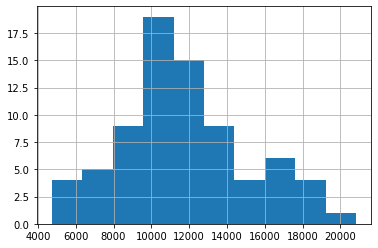

In [88]:
est2.predict(Xs).hist()


In [89]:
df['cash_cost (nickel USD/t)'].min()
df['cash_cost (nickel USD/t)'].max()


5006.36

22435.66

76      11640.622266
77       7482.669202
78       7482.669202
79      23401.655468
80       8358.647990
            ...     
1454    21059.749769
1455     6612.328114
1456    11830.596576
1457    11140.522152
1458     6758.572413
Length: 1383, dtype: float64

<AxesSubplot:>

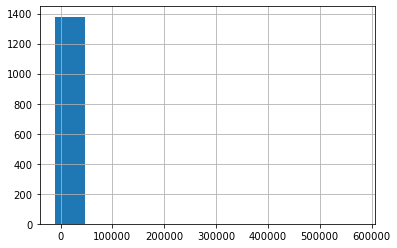

In [90]:
impute_cash_cost_index = X['cash_cost (nickel USD/t)'].isnull()
Xt = X[impute_cash_cost_index][col]
Xt = sm.add_constant(Xt) # 添加常数项
est2.predict(Xt)
est2.predict(Xt).hist()


In [91]:
df.loc[impute_cash_cost_index, 'cash_cost (nickel USD/t)'] = est2.predict(Xt)
df.loc[df['cash_cost (nickel USD/t)']<=2000, 'cash_cost (nickel USD/t)'] = 2000
df.loc[df['cash_cost (nickel USD/t)']>=25000, 'cash_cost (nickel USD/t)'] = 25000


<AxesSubplot:>

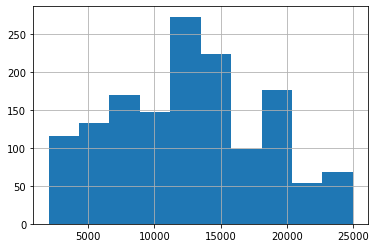

In [92]:
df['cash_cost (nickel USD/t)'].hist()


<AxesSubplot:>

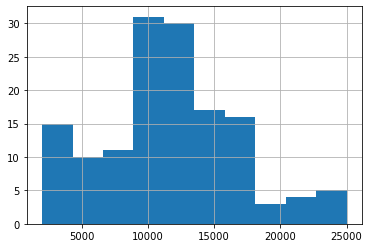

In [93]:
df[df['production_PROD_Ni_tpa'].notnull()]['cash_cost (nickel USD/t)'].hist()


In [94]:
df['cash_cost (nickel USC/lb)'] = df['cash_cost (nickel USD/t)'] / 28.652


In [95]:
df['cash_cost (nickel USD/t)'] = df['cash_cost (nickel USD/t)'] / 1.2


# Output

In [96]:
df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']] = \
df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']].round(2) 


In [97]:
df.loc[impute_grade_index, 'grade (%)'] = df.loc[impute_grade_index, 'grade (%)'].map(lambda x: str(x)+'*')

df.loc[impute_production_resv_ratio_index, 'production_resv_ratio'] = df.loc[impute_production_resv_ratio_index, 'production_resv_ratio'].map(lambda x: str(x)+'*')

df.loc[impute_reserve_index1, 'reserve_metal (mt)'] = df.loc[impute_reserve_index1, 'reserve_metal (mt)'].map(lambda x: str(x)+'*')
df.loc[impute_reserve_index2, 'reserve_metal (mt)'] = df.loc[impute_reserve_index2, 'reserve_metal (mt)'].map(lambda x: str(x)+'*')
df.loc[impute_reserve_index3, 'reserve_ore (mt)'] = df.loc[impute_reserve_index3, 'reserve_ore (mt)'].map(lambda x: str(x)+'*')

df.loc[impute_resource_index1, 'resource_metal (mt)'] = df.loc[impute_resource_index1, 'resource_metal (mt)'].map(lambda x: str(x)+'*')
df.loc[impute_resource_index2, 'resource_ore (million mt)'] = df.loc[impute_resource_index2, 'resource_ore (million mt)'].map(lambda x: str(x)+'*')

df.loc[impute_recovery_Ni_perc_index1, 'recovery_Ni_perc'] = df.loc[impute_recovery_Ni_perc_index1, 'recovery_Ni_perc'].map(lambda x: str(x)+'*')
df.loc[impute_recovery_Ni_perc_index2, 'recovery_Ni_perc'] = df.loc[impute_recovery_Ni_perc_index2, 'recovery_Ni_perc'].map(lambda x: str(x)+'*')

df.loc[impute_production_capacity_index1, 'production_capacity'] = df.loc[impute_production_capacity_index1, 'production_capacity'].map(lambda x: str(x)+'*')
df.loc[impute_production_capacity_index2, 'production_capacity'] = df.loc[impute_production_capacity_index2, 'production_capacity'].map(lambda x: str(x)+'*')
df.loc[impute_production_capacity_index3, 'production_capacity'] = df.loc[impute_production_capacity_index3, 'production_capacity'].map(lambda x: str(x)+'*')

df.loc[impute_production_index1, 'production_ROM_Ni_tpa'] = df.loc[impute_production_index1, 'production_ROM_Ni_tpa'].map(lambda x: str(x)+'*')
df.loc[impute_production_index2, 'production_PROD_Ni_tpa'] = df.loc[impute_production_index2, 'production_PROD_Ni_tpa'].map(lambda x: str(x)+'*')

df.loc[impute_deposit_type_index, 'deposit_type'] = df.loc[impute_deposit_type_index, 'deposit_type'].map(lambda x: str(x)+'*')

df.loc[impute_cash_cost_index, 'cash_cost (nickel USD/t)'] = df.loc[impute_cash_cost_index, 'cash_cost (nickel USD/t)'].map(lambda x: str(x)+'*')
df.loc[impute_cash_cost_index, 'cash_cost (nickel USC/lb)'] = df.loc[impute_cash_cost_index, 'cash_cost (nickel USC/lb)'].map(lambda x: str(x)+'*')



In [98]:
df = df.replace('nan*', np.nan)


In [99]:
df = df[['prop_id', 'prop_name', 'also_known_as', 'owner_name', 'owner_country', 'country_name', 'actv_status', 'dev_stage', 'mine_type1', 'longitude', 'latitude', 'yr_source_date', 'reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'primary_commodity', 'commodities_list', 'deposit_type', 'geologic_ore_body_type', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'production_forms', 'metall_process', 'recovery_Ni_perc', 'production_capacity', 'start_year', 'mine_life', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)', 'capital_cost_type', 'amt_capital_invested', 'country/region_op_risk', 'country/region_ter_risk', 'country/region_pol_risk', 'country/region_sec_risk', 'remark']] 
df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']] = \
np.round(df[['reserve_ore (mt)', 'grade (%)', 'reserve_metal (mt)', 'resource_ore (million mt)', 'resource_metal (mt)', 'production_ROM_Ni_tpa', 'production_PROD_Ni_tpa', 'recovery_Ni_perc', 'production_capacity', 'cash_cost (nickel USC/lb)', 'cash_cost (nickel USD/t)', 'cash_cost (ore USD/t)']], 2)


In [100]:
df.to_excel('nickel_mine_final.xlsx', index=None)


In [101]:
df


prop_id           prop_name  \
0     28021.0             Codemin   
1     36331.0          Maslovskoe   
2     27169.0      Polar Division   
3     27378.0       Kola Division   
4     30487.0          Oktyabrsky   
...       ...                 ...   
1454  66652.0           Reinfjord   
1455  67339.0        Disko Island   
1456  66654.0         Lokkarfjord   
1457  37200.0  Nuussuaq Peninsula   
1458  29813.0             Kuujjua   

                                          also_known_as  \
0     Angiquinho, Coriola, Corrego da Fazenda, Jacub...   
1     Chernogorskoe, Chernogorskoye, Maslovskoye, Ma...   
2     Glubokij, Khalilskaya, Khalilsky, Komsomol, Ko...   
3     Bistrinskoe, Bystrinskoe, Bystrinskoye, Flango...   
4     Buribay, Oktabrsky, Oktyabrskoe, Oktyabrskoye,...   
...                                                 ...   
1454                                 Oksfjord Peninsula   
1455  Disko, Disko & Nuussuaq, Disko-Nuussauq, Disko...   
1456                                 Oksfjord Peninsula   
1457                                       Disko Island   
1458                                       Minto inlier   

                                             owner_name   owner_country  \
0                                    Anglo American plc  United Kingdom   
1     Public Joint Stock Company Mining and Metallur...          Russia   
2     Public Joint Stock Company Mining and Metallur...          Russia   
3     Public Joint Stock Company Mining and Metallur...          Russia   
4     Public Joint Stock Company Mining and Metallur...          Russia   
...                                                 ...             ...   
1454                                  Nordic Mining ASA          Norway   
1455                              Kobold Metals Company             USA   
1456                                                NaN             NaN   
1457                                                NaN             NaN   
1458                                                NaN             NaN   

     country_name                 actv_status             dev_stage  \
0          Brazil                      Active             Operating   
1          Russia                      Active  Reserves Development   
2          Russia                      Active             Operating   
3          Russia                      Active             Operating   
4          Russia                      Active             Satellite   
...           ...                         ...                   ...   
1454       Norway  On Hold Awaiting Financing        Target Outline   
1455    Greenland                      Active           Exploration   
1456       Norway                    Inactive           Exploration   
1457    Greenland                    Inactive           Exploration   
1458       Canada                    Inactive           Exploration   

       mine_type1  longitude  latitude  yr_source_date reserve_ore (mt)  \
0        Open Pit  -48.33885 -14.15678          2021.0        8300000.0   
1     Underground   88.07600  69.23700          2018.0     189189189.19   
2     Underground   88.16999  69.28199          2021.0      663128000.0   
3        Open Pit   30.73034  69.39995          2021.0      100918000.0   
4     Underground   88.34008  69.52435          2021.0          74900.0   
...           ...        ...       ...             ...              ...   
1454  Underground   21.66300  70.08000          2019.0              NaN   
1455          NaN  -53.93200  70.22700          2021.0              NaN   
1456          NaN   22.51500  70.23500          2016.0              NaN   
1457          NaN  -53.67194  70.43306          2004.0              NaN   
1458          NaN -114.50639  71.42167          1997.0              NaN   

     grade (%) reserve_metal (mt) resource_ore (million mt)  \
0         1.25           104000.0                      10.6   
1         0.37           700000.0                     206.8   
2       